# Data 602 Midterm

# Selecting the Best Wine 

### Abstract

Using a dataset of the chemical characteristics of vinho verde wines, this project aimed to determine the general quality of the wine, as good, bad, or okay. The target category was determined based on the the quality variable of the original dataset, which used sensory data to score wines on a scale of 0 to 10, 0 being the worst and 10 being best. The size of the dataset is <b> 6,497 rows and 13 columns </b>, with 12 columns representing the attributes of the wine, including whether it is red or white (predictors) and 1 representing the quality (target). Ultimately, a random forest model was used, resulting in prediction accuracy of 65%.
### Introduction

The aim of this project is to apply classification machine learning methods to produce a predicive model. To do this, I utilized a dataset containing the chemical characteristics of wine in order to determine the quality of said wine. The dataset consistes of red and white varieties of a Prtuguese wine, Vino Verde and includes information on acidity, sugar content, density, pH, alcohol content, and other chemical components, such as sulfides and chlorides. 

The analysis consisted of comparing multiple machine learning models, to identify the one with the highest accuracy, and then to perform feature selection to further improve the interpretability and accuracy of the model. 

Data were retrieved from https://archive.ics.uci.edu/ml/datasets/Wine+Quality in the form of two distinct sets, one for red and one for white. 

#### My research questions were: 
1. Is a given wine good, bad, or just okay? 
2. What factors/features influence the quality determination of the wine?
3. What model will produce the most accuracy in predicting wine quality?

### Motivation

As I was considering what data to use for this project, I ran into the Wine quality data set and was inspired by a recent struggle I had. I am not a big wine drinker, and to me, all wine is relatively the same. HOWEVER, two weeks ago, I married my now husband, who comes from a long line of Italians, and, not too stereotype, but they take their wine very seriously. The motivation for this project comes from the very real struggle I faced when selecting the wine for my wedding (although this became less stressful as the pandemic greatly decreased the guest list. Silver linings...). It is my believe that a simple tool which takes the chemical components of a wine, and tells the user whether or not the wine would be considered high quality, would be extremely useful for those of us who have low wine knowledge but a desire to appear knowledgeable to our in-laws (an eternal struggle). 

### Proposed method

The methods used in this workbook include comparing 3 machine learning models for classification: logistic regression, decision trees, and random forest. The Sklearn library was used to perform the majority of the analyses, while matplotlib was used to render visuals.

The data was split into train and test data, with 5%, or 325 rows of the data held back for test data. Each model was trained using the train data and accuracy of the model was determined using 5-fold cross validation on the training data.

For my purposes, to create a simple instruction on whether the wine is good, bad, or okay, I grouped the quality scores below 4 out of 10 in the bad wine category, the 5 and 6 scores in the okay wine category, and scores 7 and over in the good wine category. This selection was based on the range of actual values in the dataset, which were 3 to 9. This way, the model gives a simple prediction that is easier to interpret.

Each model was tested for accuracy, and the model with the highest accuracy, Random Forest, was selected. The model was then further honed a grid search on several parameters (shown below in raw cell due to long run time). I also used feature selection in an attempt to narrow down the features used, although this failed to improve the outcome. 

The final model was evaluated using the test data with the results shown in the results and conclusion section.

### Data Cleaning
Find the Data Cleaning notebook here: <a href = 'https://github.com/Jcc329/Select-the-best-Wine-Predicting-wine-quality/blob/main/Jupyter%20Notebooks/Project%201%20Initial%20Data%20Cleaning%20Updated%2010_18.ipynb'>Data Cleaning Notebook</a>
### Exploratory Data Analysis and Modeling
Detailed exploratory analysis here: <a href = 'https://github.com/Jcc329/Select-the-best-Wine-Predicting-wine-quality/blob/main/Jupyter%20Notebooks/Project%201%20Exploratory%20Analysis%20Updated.ipynb'>Exploratory Analysis Notebook</a>

For a brief review of the data exploration, including demonstrations of the models attempted, scroll down.


### Limitations and later work.

The dataset consistes of red and white varieties of a portuguese wine, vinho verde and the model may not generalize to other types of wine. Additionally, the quality of the wine is based on the features valued in vinho verde specifically, and may not translate to other types of wine. 

In addition to whether or not the results translate to other wine types, the data is not evenly distributed, with far mor average wines than particularly good or bad wines. I chose not to weight the model because doing so did not improve accuracy. However, as a result, my model works well for good and okay wine, but was unable to accurately identify bad wines. 

To improve this result, future work should aim at expanding the data set to include a wider variety of wine qualities, and therefore improve predictive accuracy for the more extreme outcomes.

### References and contributions

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Aurlien Gron. 2017. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (1st. ed.). O'Reilly Media, Inc.

I used several blogs and guides to understand the sklearn library. This are listed here:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Documentation for RandomForestClassifier)
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation (Documentation for cross validation)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Documentation for LogisticRegression)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (Documentation for classification_report)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html (Documentation for confusion_matrix)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html (Documentation for feature scaling)

https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn (plotting a random forest example)
https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels (visualizing confusion matrix)
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f (feature selection with random forest models)

In [1]:
#import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns #for visualizations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
import collections
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.model_selection import GridSearchCV

import timeit
start_time = timeit.default_timer()

In [2]:
#import my data
winesdf = pd.read_csv('./WinesData.csv')
winesdf.head() #view the data
winesdf.drop('Unnamed: 0', axis=1, inplace = True)
winesdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'categories'],
      dtype='object')

In [3]:
winesdf.shape

(6497, 13)

### Brief Exploratory Data Analysis   
The plan for my exploritory analysis was:
- Study each attribute and it's characteristics
- Visualize the data and explore correlations between attributes
- Identify transformations that may help with data analysis
- Apply Transformations
- Feature Selection
- Feature engineering
- Feature Scaling
- Train three models (Logistic, Decision Tree, Random forest) using standard parameters and compare
- Select the best model and fine-tune

In [4]:
# Examine Data:
winesdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024169F35640>,
      dtype=object)

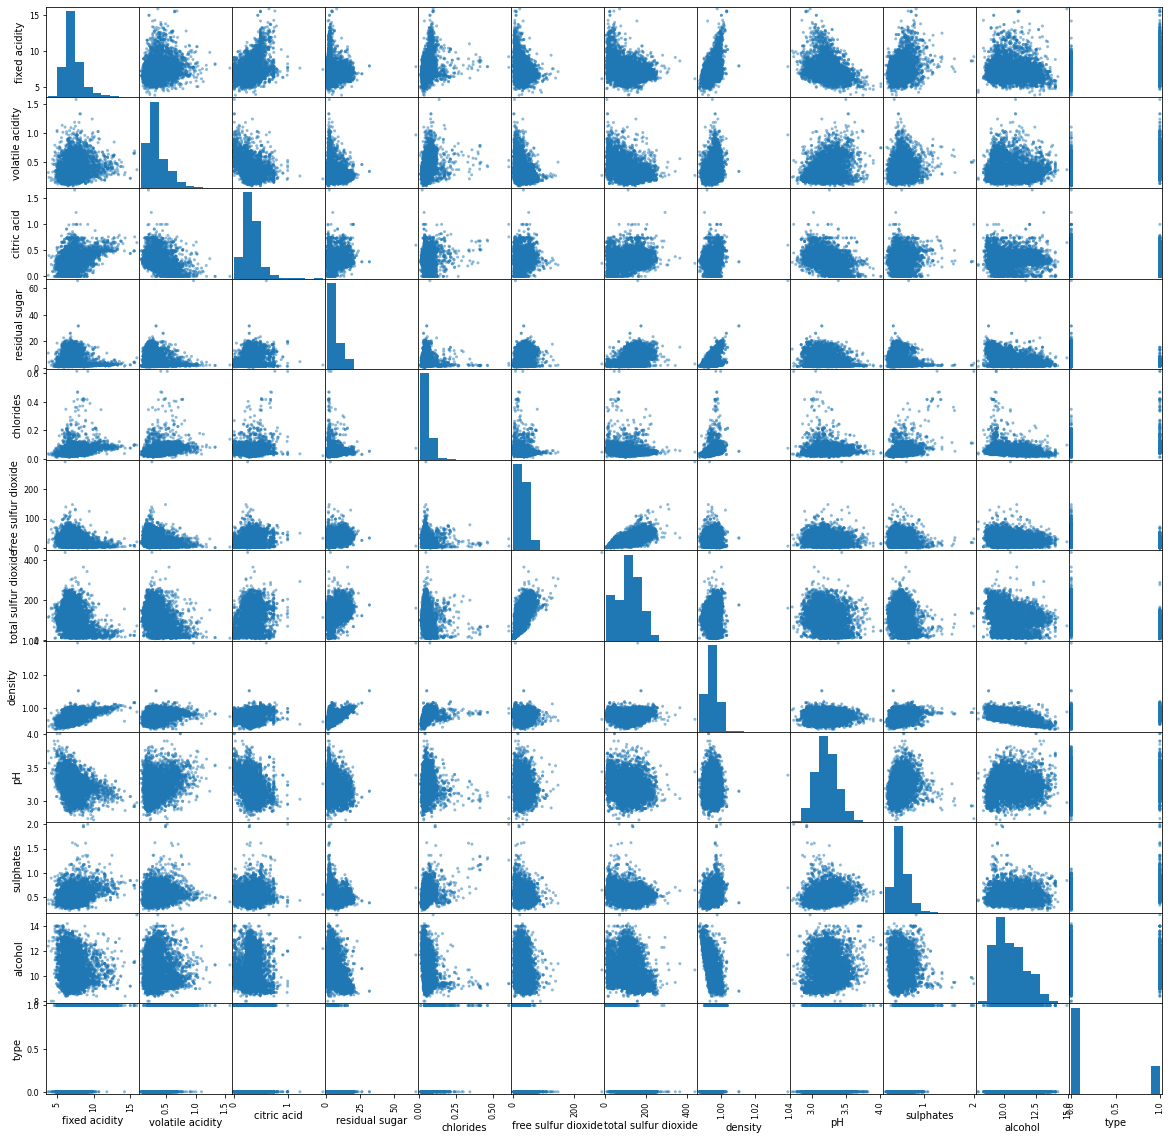

In [5]:
scatter_matrix(winesdf[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']], figsize =(20,20))

The ranges on the attributes are fairly variable and so feature scaling will need to occur before we fit a model. The two options are min-max scaling, or normalization, which scales features to a range of 0 to 1, and standardization, which is less affected by outliers but is not bound by specific value ranges. 

The Logistic Regression model ended up using the scaled data for improved oucomes, although the decision tree and random forest models did not. Before scaling, however, I did resample the data using to methods, which I then tested, SMOTE and ADASYN. The methods tried are from https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn

I anticipated that ADASYN will work best given the statement: '...the difference between ADASYN and SMOTE. ADASYN will focus on the samples which are difficult to classify with a nearest-neighbors rule while regular SMOTE will not make any distinction. Therefore, the decision function depending of the algorithm.'

However, once the final models were fit, SMOTE provided the best results. Below, I will go through an example of the data transformations and some of the tests I ran. I will limit these to the SMOTE resampling to conserve space. For the complete comparison, see the Exploratory Analysis Notebook. 

In [6]:
from sklearn.preprocessing import LabelEncoder

varlist = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']

le = LabelEncoder()
le.fit(winesdf['categories'])
y = le.transform(winesdf['categories'])
X = winesdf[varlist]

In [7]:
#Data Transformations:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 10152020)

In [8]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train, y_train)
print(sorted(collections.Counter(y_resampled_SMOTE).items()))
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train, y_train)
print(sorted(collections.Counter(y_resampled_SMOTE).items()))

[(0, 4737), (1, 4737), (2, 4737)]
[(0, 4737), (1, 4737), (2, 4737)]


In [9]:
std_scaler = StandardScaler()

#I am choosing to do a standardization scale in order to avoid the impact of any outliers
std_scaler.fit(X_resampled_SMOTE) ## training_mean and std calculated
X_train_scaled_SMOTE = std_scaler.transform(X_resampled_SMOTE) ## only use training mean and std
X_test_scaled_SMOTE  = std_scaler.transform(X_test)
std_scaler.fit(X_resampled_ADASYN) ## training_mean and std calculated
X_train_scaled_ADASYN = std_scaler.transform(X_resampled_ADASYN) ## only use training mean and std
X_test_scaled_ADASYN  = std_scaler.transform(X_test)

#### For the Linear Regression model, I used the scaled data, for the decision tree and random forest models I did not. I started with the Linear Regression. I fit the model, and then examined the accuracy using cross validation and a confusion matrix.

In [10]:
# Bring in function from .py file
%run MidtermFunctionsUpdated.py

In [11]:
from sklearn.linear_model import LogisticRegression #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg_SMOTE = LogisticRegression(max_iter=10000, random_state = 10152020)
logreg_SMOTE.fit(X_train_scaled_SMOTE, y_resampled_SMOTE)
print('Accuracy of Logistic regression classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(logreg_SMOTE.score(X_train, y_train)))

Accuracy of Logistic regression classifier on training set resampled with ADASYN methods: 0.55


[0.7836743  0.78164877 0.7782503  0.78088295 0.77987039] [0.76761134 0.77975709 0.78444084 0.78525122 0.78606159]
Mean Training Accuracy: 0.7808653431782379 Mean Test Accuracy: 0.7806244135460206
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.21      0.44      0.28      1198
           2       0.78      0.60      0.68      4737

    accuracy                           0.55      6172
   macro avg       0.33      0.35      0.32      6172
weighted avg       0.64      0.55      0.58      6172



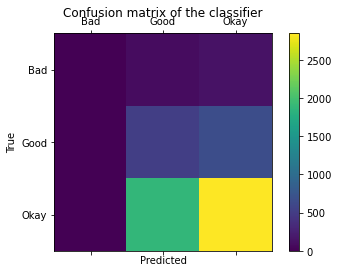

In [12]:
Accuracy(logreg_SMOTE, X_train, y_train, 5)
VizConfusionMatrix(logreg_SMOTE, X_train, y_train)

Accuracy of Decision Tree classifier on training set resampled with ADASYN methods: 0.19


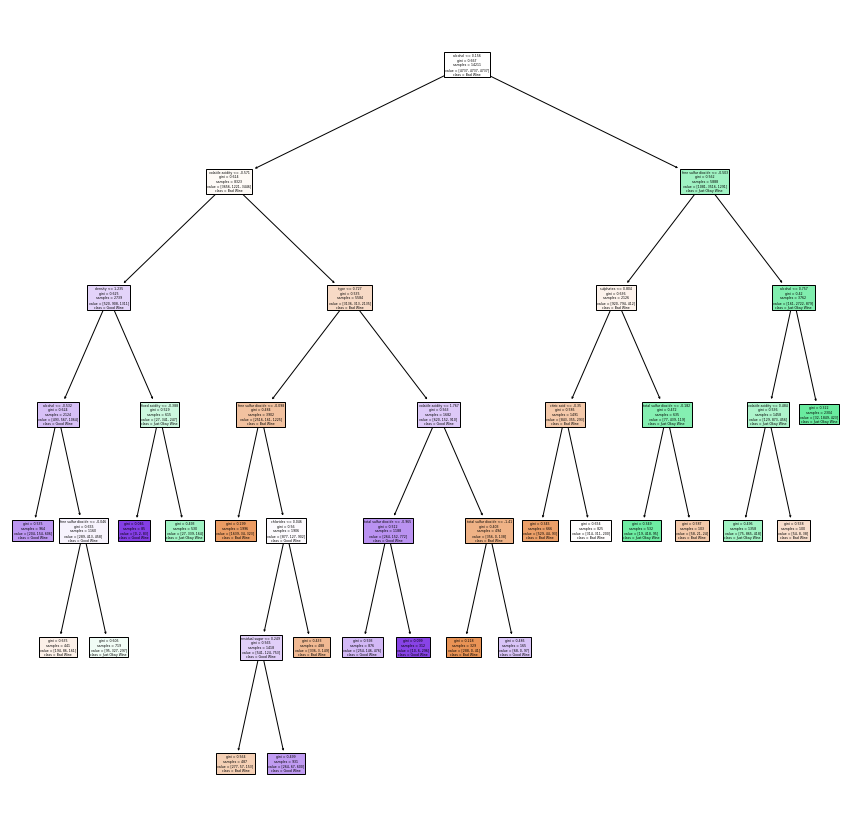

In [13]:
estimator_DTSMOTE = tree.DecisionTreeClassifier(max_leaf_nodes = 20, random_state =  10152020)
estimator_DTSMOTE = estimator_DTSMOTE.fit(X_train_scaled_SMOTE, y_resampled_SMOTE)

draw_tree(estimator_DTSMOTE, varlist, 'dt_SMOTE.png')

print('Accuracy of Decision Tree classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(estimator_DTSMOTE.score(X_train, y_train)))

[0.80595503 0.80473972 0.80619684 0.79829891 0.799919  ] [0.78380567 0.79190283 0.78687196 0.7917342  0.79335494]
Mean Training Accuracy: 0.8030218993419969 Mean Test Accuracy: 0.7895339208262522
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.19      1.00      0.33      1198
           2       0.00      0.00      0.00      4737

    accuracy                           0.19      6172
   macro avg       0.06      0.33      0.11      6172
weighted avg       0.04      0.19      0.06      6172



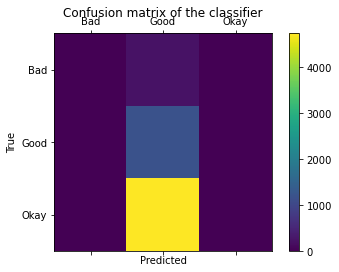

In [14]:
Accuracy(estimator_DTSMOTE, X_train, y_train, 5)
VizConfusionMatrix(estimator_DTSMOTE, X_train, y_train)

Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.19


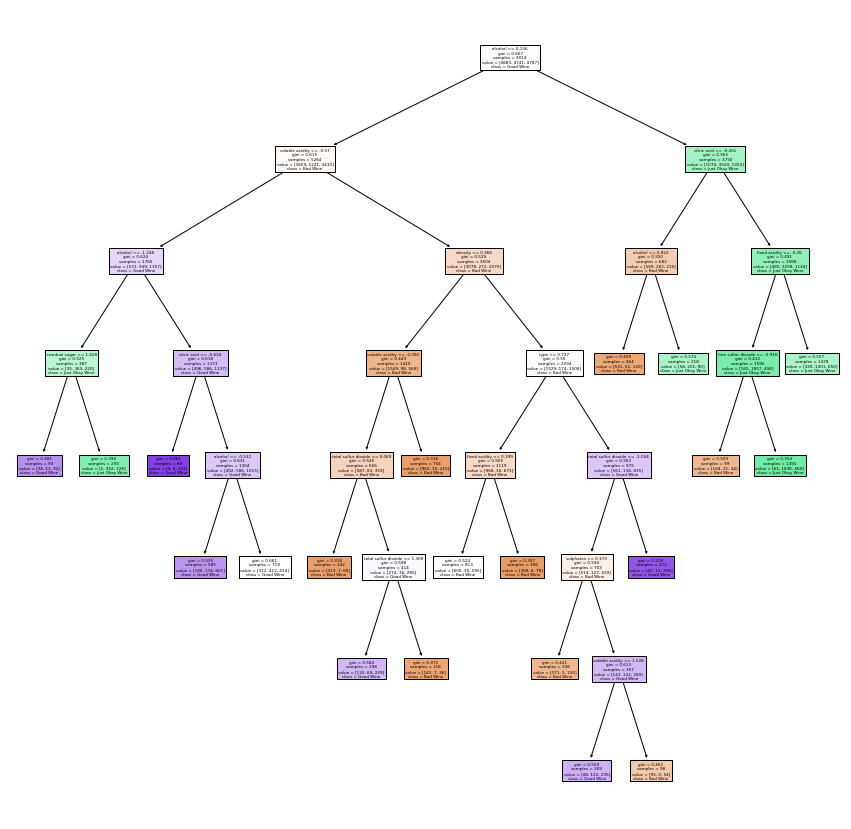

In [16]:
estimator_RFSMOTE = RandomForestClassifier(max_leaf_nodes=20, random_state = 10152020)
estimator_RFSMOTE= estimator_RFSMOTE.fit(X_train_scaled_SMOTE, y_resampled_SMOTE)

draw_tree(estimator_RFSMOTE.estimators_[0], varlist, 'rf_SMOTE.png')

print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFSMOTE.score(X_train, y_train)))

[0.81223415 0.80676524 0.80579182 0.80781693 0.80862697] [0.78785425 0.78947368 0.79011345 0.79497569 0.80551053]
Mean Training Accuracy: 0.8082470230616583 Mean Test Accuracy: 0.7935855222147127
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.19      1.00      0.33      1198
           2       0.00      0.00      0.00      4737

    accuracy                           0.19      6172
   macro avg       0.06      0.33      0.11      6172
weighted avg       0.04      0.19      0.06      6172



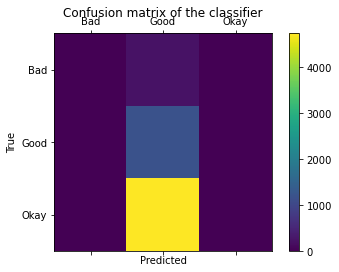

In [17]:
Accuracy(estimator_RFSMOTE, X_train, y_train, 5)
VizConfusionMatrix(estimator_RFSMOTE, X_train, y_train)

Based on the distribution of errors (Logistic regression models failed to predict any bad wines) and the cross-validation accuracy scores, which showed the highest accuracy for Random forest, I proceeded with fine tuning the random forest model. At this point, I will also continue testing the model with both the SMOTE and ADASYN resampling data as they are very close in terms of results. SMOTE ended up being more accurate, with slightly higher precision than ADASYN and so I only demonstrate my action using models fitted to the smote resampled data. For more detailed analysis, see the exploratory analysis notebook.

#### After identifying Random Forests as the most accurate model, I performed some feature engineering, carying out a grid search, shown below, to tune the parameters. Furthermore, I attempted some feature selection, which did not improve accuracy, and so I ultimately chose to use all of the features. I included an example of the syntax used for this process below anyway.

### Feature engineering

Below, I use grid search to identify the best parameters to use in my chosen model.

I then use the SelectFromModel function from sklearn to identify the important features in the dataset, and I refit the random forest model to the data with those features. This resulted in a slight decrease to the precision of the model, while the overall accuracy remained about the same, Accuracy: 0.78 (+/- 0.04). However, for the sake of a cleaner model, I jchose to use the fewer features. 

In [18]:
grid_param = {'n_estimators': [50,100,200],
              'max_features':['sqrt', 'log2', None],
              'max_leaf_nodes': [10,20,30]
             }

In [19]:
estimator = RandomForestClassifier()
clf = GridSearchCV(estimator = estimator, param_grid= grid_param,cv=5, return_train_score=True) #Chose to leave the verbose out for asthetic reasons here. Included in the EA notebook

In [20]:
clf.fit(X_resampled_SMOTE, y_resampled_SMOTE)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [21]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending=False).T

,8,16,17,6,7,15,24,25,26,5,...,22,0,2,11,1,10,18,19,9,20
mean_fit_time,1.85597,0.927294,1.85579,0.478258,0.955655,0.468978,1.53616,3.03671,6.04135,1.7565,...,2.70462,0.3907,1.43767,1.40434,0.767751,0.704723,1.11978,2.21963,0.369218,4.42611
std_fit_time,0.0576409,0.0289635,0.0423991,0.0162276,0.0421983,0.0103335,0.0201458,0.121897,0.20163,0.0512307,...,0.094146,0.0309048,0.0288823,0.0304075,0.0407029,0.0188265,0.0396092,0.0624557,0.00812356,0.105839
mean_score_time,0.0486623,0.0243366,0.0468745,0.0133643,0.0245283,0.0131649,0.0133509,0.0245327,0.0450801,0.0458717,...,0.0225322,0.0115705,0.0400935,0.039487,0.0226365,0.0207438,0.0115995,0.0205482,0.0118131,0.0393015
std_score_time,0.00229759,0.000797038,0.000621562,0.000488169,0.000496348,0.000746582,0.00101561,0.000489712,0.00116439,0.00154879,...,0.000785772,0.000489767,0.00116158,0.000481444,0.00140072,0.000746457,0.000519661,0.000803195,0.000727557,0.000785964
param_max_features,sqrt,log2,log2,sqrt,sqrt,log2,None,None,None,sqrt,...,None,sqrt,sqrt,log2,sqrt,log2,None,None,log2,None
param_max_leaf_nodes,30,30,30,30,30,30,30,30,30,20,...,20,10,10,10,10,10,10,10,10,10
param_n_estimators,200,100,200,50,100,50,50,100,200,200,...,100,50,200,200,100,100,50,100,50,200
params,"{'max_features': 'sqrt', 'max_leaf_nodes': 30,...","{'max_features': 'log2', 'max_leaf_nodes': 30,...","{'max_features': 'log2', 'max_leaf_nodes': 30,...","{'max_features': 'sqrt', 'max_leaf_nodes': 30,...","{'max_features': 'sqrt', 'max_leaf_nodes': 30,...","{'max_features': 'log2', 'max_leaf_nodes': 30,...","{'max_features': None, 'max_leaf_nodes': 30, '...","{'max_features': None, 'max_leaf_nodes': 30, '...","{'max_features': None, 'max_leaf_nodes': 30, '...","{'max_features': 'sqrt', 'max_leaf_nodes': 20,...",...,"{'max_features': None, 'max_leaf_nodes': 20, '...","{'max_features': 'sqrt', 'max_leaf_nodes': 10,...","{'max_features': 'sqrt', 'max_leaf_nodes': 10,...","{'max_features': 'log2', 'max_leaf_nodes': 10,...","{'max_features': 'sqrt', 'max_leaf_nodes': 10,...","{'max_features': 'log2', 'max_leaf_nodes': 10,...","{'max_features': None, 'max_leaf_nodes': 10, '...","{'max_features': None, 'max_leaf_nodes': 10, '...","{'max_features': 'log2', 'max_leaf_nodes': 10,...","{'max_features': None, 'max_leaf_nodes': 10, '..."
split0_test_score,0.713683,0.718607,0.708407,0.714386,0.71509,0.713683,0.701724,0.696799,0.701372,0.697151,...,0.674991,0.653183,0.645445,0.650018,0.653183,0.649666,0.643335,0.645093,0.647555,0.643335
split1_test_score,0.740324,0.742435,0.738213,0.740676,0.73962,0.736101,0.739268,0.737157,0.738564,0.71886,...,0.71323,0.682266,0.679803,0.676636,0.674173,0.680859,0.679803,0.678395,0.678395,0.675581


In [22]:
print("best parameters  are: ", clf.best_params_)

best parameters  are:  {'max_features': 'sqrt', 'max_leaf_nodes': 30, 'n_estimators': 200}


#### I used the above parameters to tune the function and then performed my final step, feature selection

In [23]:
sel = SelectFromModel(estimator_RFSMOTE)
sel.fit(X_resampled_SMOTE, y_resampled_SMOTE)

NameError: name 'SelectFromModel' is not defined

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

In [ ]:
#Below I test the model with the selected features

estimator_RFSMOTE2 = RandomForestClassifier(n_estimators = 200, max_features = 'sqrt', max_leaf_nodes=30,  random_state = 10152020)
estimator_RFSMOTE2= estimator_RFSMOTE2.fit(X_resampled_SMOTE[selected_feat], y_resampled_SMOTE)
Accuracy(estimator_RFSMOTE2, X_train[selected_feat], y_train, 5)
VizConfusionMatrix(estimator_RFSMOTE2, X_train[selected_feat], y_train)

This did not improve my outcome, and so I attempted manual selection based on the correlations discussed above. 

In [ ]:
man_sel_feat = ['volatile acidity', 'chlorides', 'density', 'alcohol', 'type']
estimator_RFSMOTE2 = RandomForestClassifier(max_features = 'log2', max_leaf_nodes=30, random_state = 10152020)
estimator_RFSMOTE2= estimator_RFSMOTE2.fit(X_resampled_SMOTE[man_sel_feat], y_resampled_SMOTE)
Accuracy(estimator_RFSMOTE2, X_train[man_sel_feat], y_train, 5)
VizConfusionMatrix(estimator_RFSMOTE2, X_train[man_sel_feat], y_train)

#### This also failed to improve my outcome. I therefore chose to fit my final model with all features included.

### The final model and model evaluation is shown below:

In [ ]:
FINAL_MODEL = RandomForestClassifier(n_estimators = 200, max_features = 'sqrt', max_leaf_nodes=30,  random_state = 10152020)
FINAL_MODEL= FINAL_MODEL.fit(X_resampled_SMOTE[selected_feat], y_resampled_SMOTE)

In [ ]:
test_report(estimator_RFSMOTE, X_test, y_test)

### Results and discussion

Upon comparing three types of models, decision tree, logistic regression, and random forest, the random forest model was moderately more accurate than the logistic regression when applied to the test data. This was therefore selected as the model to proceed with and feature selection was applied. 

None of the models were able to accurately predict wines, likely due to the low number of bad wines in the dataset. While tuning moderately improved  the prediction rate, a final prediction rate of 65% falls short of my goal to attain higher than 77%, the percent acuracy if I were to predict all wines were just okay. 

### summary

Using the wine quality dataset, this project aimed to determine the general quality of the wine, as good, bad, or okay. The target category was determined based on the the quality variable of the original dataset, which used sensory data to score wines on a scale of 0 to 10, 0 being the worst and 10 being best. The grouping was determined based on the range of scores in the data (3 to 9) and the desire for simple categorical labels as the output. Again, the size of the dataset was 6,497 rows and 12 columns with 11 columns representing the chemical attributes of the wine (predictors) and 1 representing the quality (target).

During data exploration, I explored two methods of balancing the data, SMOTE and ADASYN. I also tested three posible algorithms, logistic regression, decision tree, and random forest models, to determine which would produce the most accurate predictions. The random forest model performed the best in terms of accuracy, and since the aim is to obtain accurate predictions than to understand exactly why the wine is good or bad, I chose to use the more accurate method. Finally, I used a grid search to tune the parameters for the random forest model and the feature selection module in sklearn to identify the most important features, which did not improve the accuracy. I chose to keep all the features in the model to improve accuracy, however, despite all of this, I was unable to achieve a prediction accuracy capable of doing better than just rating all wines as okay

### Conclusion

Based on the outcome of these analysis, this model is is not really useful for predicting wine quality. (And is likely not sufficient to impress my in-laws). However, I did gain a significant amount of experience and practice with respect to using different categorical machine learning models, and the start to finish process of performing a machine learning project. I am also far more familiar now with the sklearn library than I was before, and look forward to further exploring it's capabilities. 